In [ ]:
## 📝 Entregables del Proyecto

### 1. **Análisis Exploratorio de Datos (EDA)** - 20%
- Análisis descriptivo completo de todas las variables
- Visualizaciones de distribuciones y relaciones
- Identificación de problemas de calidad de datos
- Análisis de correlaciones
- Detección visual de outliers y valores faltantes

**Notebook**: `01_EDA.ipynb`

# 1. **Análisis Exploratorio de Datos (EDA)** - 20%

In [ ]:
# ### 1. **Análisis Exploratorio de Datos (EDA)** - 20%

# 1A Análisis descriptivo completo de todas las variables
# 1B Visualizaciones de distribuciones y relaciones
# 1C Identificación de problemas de calidad de datos
# 1D Análisis de correlaciones
# 1E Detección visual de outliers y valores faltantes

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

print('Bibliotecas importadas correctamente')

Bibliotecas importadas correctamente


In [18]:
df=pd.read_csv("german_credit_data.txt", 
    sep=r"\s+",        # separador por espacios (uno o más)
    header=None,       # no hay encabezados
    na_values="?"      # convierte '?' en NaN
)

In [19]:
column_names = [
    "status_account",              # ATRIBUTO 1
    "duration",                    # ATRIBUTO 2
    "credit_history",              # ATRIBUTO 3
    "purpose",                     # ATRIBUTO 4
    "credit_amount",               # ATRIBUTO 5
    "savings",                     # ATRIBUTO 6
    "employment_since",            # ATRIBUTO 7
    "installment_rate",            # ATRIBUTO 8
    "personal_status",             # ATRIBUTO 9
    "other_debtors",               # ATRIBUTO 10
    "residence_since",             # ATRIBUTO 11
    "property",                    # ATRIBUTO 12
    "age",                         # ATRIBUTO 13
    "other_installments",          # ATRIBUTO 14
    "housing",                     # ATRIBUTO 15
    "num_credits",                 # ATRIBUTO 16
    "job",                         # ATRIBUTO 17
    "num_liable",                  # ATRIBUTO 18
    "telephone",                   # ATRIBUTO 19
    "foreign_worker",              # ATRIBUTO 20
    "target",                      # ATRIBUTO 21 (variable objetivo)
    "payment_behavior",            # ATRIBUTO 22
    "debt_to_income_ratio",        # ATRIBUTO 23
    "num_previous_loans",          # ATRIBUTO 24
    "monthly_income",              # ATRIBUTO 25
    "credit_duration_ratio",       # ATRIBUTO 26
    "age_employment_interaction",  # ATRIBUTO 27
    "bmi",                         # ATRIBUTO 28
    "gender"                       # ATRIBUTO 29
]

In [20]:
df.columns=column_names
df.tail()

,status_account,duration,credit_history,purpose,credit_amount,savings,employment_since,installment_rate,personal_status,other_debtors,...,foreign_worker,target,payment_behavior,debt_to_income_ratio,num_previous_loans,monthly_income,credit_duration_ratio,age_employment_interaction,bmi,gender
1245,no_checking_account,35.0,existing_paid_duly,car_new,3094.0,no_savings_account,employed_1_to_4yr,4.0,male_single,none,...,foreign_worker_yes,good_client,payment_good,0.110,0.0,500.0,88.40,87.5,20.1,Male
1246,no_checking_account,35.0,critical_account,car_new,8271.0,NaN,employed_1_to_4yr,4.0,female_divorced_married,none,...,foreign_worker_yes,bad_client,payment_poor,0.567,NaN,1016.0,236.31,57.5,25.1,Female
1247,no_checking_account,12.0,critical_account,education,2993.0,savings_below_100,employed_above_7yr,2.0,female_divorced_married,none,...,foreign_worker_yes,good_client,payment_fair,0.166,8.0,500.0,249.42,385.0,21.9,Female
1248,checking_below_0,12.0,existing_paid_duly,car_used,NaN,savings_below_100,employed_above_7yr,3.0,male_single,none,...,foreign_worker_yes,bad_client,payment_poor,NaN,NaN,567.0,NaN,259.0,25.9,Female
1249,checking_0_to_200,33.0,delay_in_past,car_new,2321.0,savings_below_100,employed_above_7yr,4.0,male_single,none,...,foreign_worker_yes,bad_client,payment_fair,0.650,1.0,500.0,70.33,406.0,18.8,Male


## 1A Análisis descriptivo completo de todas las variables

In [ ]:
#- Análisis descriptivo completo de todas las variables
print("Informacion general del dataset")
print("=="*60)
print(f"Dimensiones generales del dataset,  {df.shape[0]} Filas X {df.shape[1]} Columnas")
print("\nTipo de datos:")
print(df.dtypes)
print("=="*60)
print("\ninformacion detallada de columnas")
print(df.info())


Informacion general del dataset
Dimensiones generales del dataset,  1250 Filas X 29 Columnas

Tipo de datos:
status_account                 object
duration                      float64
credit_history                 object
purpose                        object
credit_amount                 float64
savings                        object
employment_since               object
installment_rate              float64
personal_status                object
other_debtors                  object
residence_since                 int64
property                       object
age                           float64
other_installments             object
housing                        object
num_credits                     int64
job                            object
num_liable                      int64
telephone                      object
foreign_worker                 object
target                         object
payment_behavior               object
debt_to_income_ratio          float64
num_previous_loan

In [22]:
# Identificar tipos de variables
numeric_cols=df.select_dtypes(include=['number']).columns.to_list()
categorical_cols=df.select_dtypes(include=["object"]).columns.to_list()

print("Clasificación de variables")
print("=="*60)
print(f"Cantidad de variables numéricas en el dataset es igual a {len(numeric_cols)}")
print(print(f"Cantidad de variables categóricas en el dataset es igual a {len(categorical_cols)}"))


Clasificación de variables
Cantidad de variables numéricas en el dataset es igual a 13
Cantidad de variables categóricas en el dataset es igual a 16
None


In [24]:
# Clasificar numéricas en continuas y discretas
discretas=["installment_rate", "num_previous_loans", "residence_since", "num_credits",  "num_liable"]
continuas=["duration","credit_amount", "debt_to_income_ratio", "monthly_income", "credit_duration_ratio", "age_employment_interaction", "bmi", "age"]
print("Clasificación de variables numéricas")
print("\nVariables Discretas")
print(f"En total tenemos ({len(discretas)}) variables discretas:")
print(f"{discretas}")
print("=="*60)
print("\nVariables Continuas")
print(f"En total tenemos ({len(continuas)}) variables continuas:")
print(f"{continuas}")

Clasificación de variables numéricas

Variables Discretas
En total tenemos (5) variables discretas:
['installment_rate', 'num_previous_loans', 'residence_since', 'num_credits', 'num_liable']

Variables Continuas
En total tenemos (8) variables continuas:
['duration', 'credit_amount', 'debt_to_income_ratio', 'monthly_income', 'credit_duration_ratio', 'age_employment_interaction', 'bmi', 'age']


In [27]:
# Clasificar categóricas en nominales y ordinales
nominales=["credit_history", "status_account", "purpose","personal_status","property", "other_installments", "housing", "telephone", "foreign_worker", "target", "gender","other_debtors" ]
ordinales=["savings","employment_since", "job", "payment_behavior" ]

print("Clasificación de variables categoricas")
print("\nVariables categoricas Nominales")
print(f"En total tenemos ({len(nominales)}) variables nominales:")
print(f"{nominales}")
print("=="*60)
print("\nVariables ordinales")
print(f"En total tenemos ({len(ordinales)}) variables ordinales:")
print(f"{ordinales}")


Clasificación de variables categoricas

Variables categoricas Nominales
En total tenemos (12) variables nominales:
['credit_history', 'status_account', 'purpose', 'personal_status', 'property', 'other_installments', 'housing', 'telephone', 'foreign_worker', 'target', 'gender', 'other_debtors']

Variables ordinales
En total tenemos (4) variables ordinales:
['savings', 'employment_since', 'job', 'payment_behavior']


In [28]:
print('ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS')
print("=="*80)
df[numeric_cols].describe()
print("=="*80)
print(" Estadisticas adicionales:")
df_std=pd.DataFrame({"Minimo":df[numeric_cols].min(),
              "Media":df[numeric_cols].mean(),
              "Mediana":df[numeric_cols].median(),
              "Maximo":df[numeric_cols].max(),
              "desviacion estandar":df[numeric_cols].std(),
             "Moda":df[numeric_cols].mode().iloc[0],
             "Rango":df[numeric_cols].max()- df[numeric_cols].min(),
             'IQR': df[numeric_cols].quantile(0.75) - df[numeric_cols].quantile(0.25),
             "CV": (df[numeric_cols].std()/df[numeric_cols].mean()*100).round(2)})
df_std.head(16)


ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS
 Estadisticas adicionales:


,Minimo,Media,Mediana,Maximo,desviacion estandar,Moda,Rango,IQR,CV
duration,1.000,21.147179,18.000,72.000,12.449883,24.00,71.000,13.00000,58.87
credit_amount,1.000,3301.497537,2307.000,19323.000,2890.797736,1169.00,19322.000,2627.00000,87.56
installment_rate,-1.710,2.996974,3.000,16.660,1.318080,4.00,18.370,2.00000,43.98
residence_since,1.000,2.835200,3.000,4.000,1.103909,4.00,3.000,2.00000,38.94
age,1.000,35.715807,33.000,304.000,14.485447,27.00,303.000,15.00000,40.56
num_credits,1.000,1.401600,1.000,4.000,0.570419,1.00,3.000,1.00000,40.70
num_liable,1.000,1.152000,1.000,2.000,0.359165,1.00,1.000,0.00000,31.18
debt_to_income_ratio,-0.466,0.268736,0.182,1.153,0.211077,0.06,1.619,0.37125,78.54
num_previous_loans,0.000,2.541495,2.000,9.000,1.726381,2.00,9.000,3.00000,67.93
monthly_income,-90.000,576.563115,500.000,1962.000,200.102308,500.00,2052.000,0.00000,34.71


In [29]:
print('ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS')
print('='*80)

for col in categorical_cols: 
    print(f"\n{col.upper()}")
    print("-"*80)
    counts=df[col].value_counts(dropna=False)
    percentages=df[col].value_counts(normalize=True, dropna=False)*100
    results=pd.DataFrame({"Frecuencia": counts, "Porcentaje":percentages})
    print(results)
    print(f"\nNúmero de categorías únicas: {df[col].nunique(dropna=False)}")
    print(f'Moda: {df[col].mode()[0]}')



ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS

STATUS_ACCOUNT
--------------------------------------------------------------------------------
                     Frecuencia  Porcentaje
status_account                             
no_checking_account         493       39.44
checking_below_0            342       27.36
checking_0_to_200           339       27.12
checking_above_200           76        6.08

Número de categorías únicas: 4
Moda: no_checking_account

CREDIT_HISTORY
--------------------------------------------------------------------------------
                     Frecuencia  Porcentaje
credit_history                             
existing_paid_duly          666       53.28
critical_account            367       29.36
delay_in_past               111        8.88
all_paid_this_bank           58        4.64
no_credits_all_paid          48        3.84

Número de categorías únicas: 5
Moda: existing_paid_duly

PURPOSE
------------------------------------------------------------

## 1B Visualizaciones de distribuciones y relaciones

In [30]:
#vISUALIZAMOS las distribucion de las variables numericas 

numeric_cols=df.select_dtypes(include=["int64", "float64"]).columns
numeric_cols

Index(['duration', 'credit_amount', 'installment_rate', 'residence_since',
       'age', 'num_credits', 'num_liable', 'debt_to_income_ratio',
       'num_previous_loans', 'monthly_income', 'credit_duration_ratio',
       'age_employment_interaction', 'bmi'],
      dtype='object')

array([[<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'credit_amount'}>,
        <Axes: title={'center': 'installment_rate'}>,
        <Axes: title={'center': 'residence_since'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'num_credits'}>,
        <Axes: title={'center': 'num_liable'}>,
        <Axes: title={'center': 'debt_to_income_ratio'}>],
       [<Axes: title={'center': 'num_previous_loans'}>,
        <Axes: title={'center': 'monthly_income'}>,
        <Axes: title={'center': 'credit_duration_ratio'}>,
        <Axes: title={'center': 'age_employment_interaction'}>],
       [<Axes: title={'center': 'bmi'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

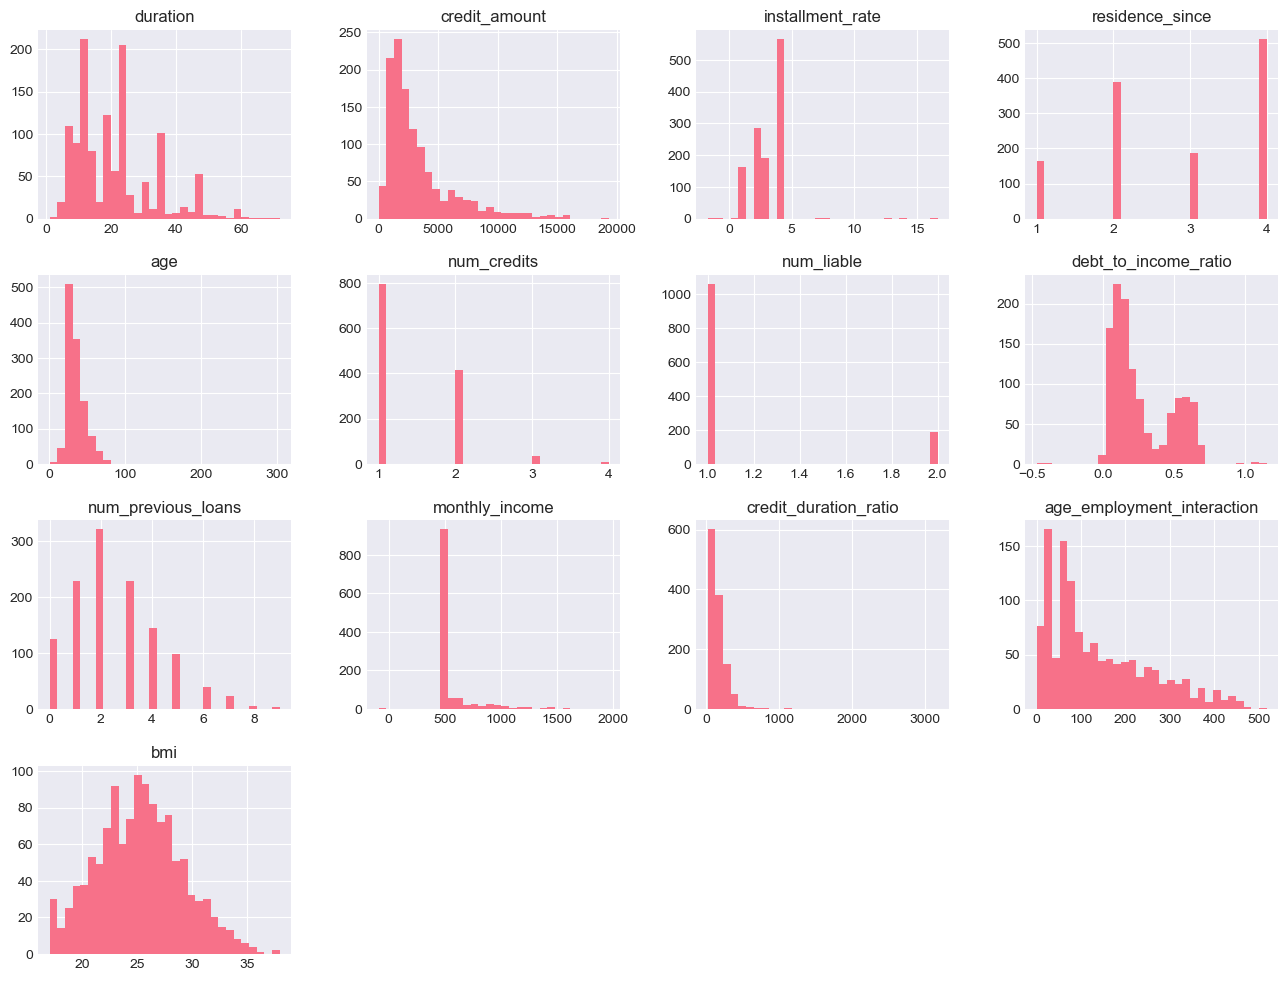

In [31]:
df[numeric_cols].hist(figsize=(16,12), bins=30)

In [32]:
# Analisis de asimetria y curtosis de las variables numericas: 

#Hacemos un solo dataframe consolidando ambas series temporales de pandas skew() & kurtosis()
Curtosis=df[numeric_cols].kurtosis()
Asimetria=df[numeric_cols].skew()
lista=[]

result=pd.DataFrame({"Asimetria":Asimetria, "Curtosis":Curtosis})
print("\ninterpretación")
for col in numeric_cols:
    skew=df[col].skew()
    kurt=df[col].kurtosis().round(2)
    

    if abs(skew)<0.5:
        #print(f"La distribución de {col} es simétrica")
        Class_skew="Simetrica"
    elif skew>0:
        #print(f"La distribución de {col} es asimétrica con una cola hacia valores grandes (derecha) lo que desplaza la media hacia la derecha media> mediana")
        Class_skew="Asimetrica +"
    else:
        #print(f"La distribución de {col} es asimétrica con una cola hacia valores bajos (izquierda) lo que desplaza la media hacia la izquierda media< mediana")
        Class_skew="Asimetrica -"

    if abs(kurt)<0.5:
        #'Mesocúrtica (normal)'
        Class_Curtosis="Normal"
    elif kurt>0: 
        Class_Curtosis="Puntiaguda"
    else:
        Class_Curtosis="Aplanada"

    propiedades={
    "Atributo":col,
    "Valor skew":skew,
    "Clasificacion skew":Class_skew,
    "Valor Curtosis":kurt,
    "Clasificacion Curtosis":Class_Curtosis
    }
    lista.append(propiedades)

resultado=pd.DataFrame(lista)
resultado



interpretación


,Atributo,Valor skew,Clasificacion skew,Valor Curtosis,Clasificacion Curtosis
0,duration,1.057904,Asimetrica +,0.84,Puntiaguda
1,credit_amount,1.925687,Asimetrica +,4.05,Puntiaguda
2,installment_rate,1.648830,Asimetrica +,16.52,Puntiaguda
3,residence_since,-0.257466,Simetrica,-1.39,Aplanada
4,age,6.132432,Asimetrica +,98.74,Puntiaguda
5,num_credits,1.233160,Asimetrica +,1.37,Puntiaguda
6,num_liable,1.940936,Asimetrica +,1.77,Puntiaguda
7,debt_to_income_ratio,0.754147,Asimetrica +,-0.32,Normal
8,num_previous_loans,0.705428,Asimetrica +,0.34,Normal
9,monthly_income,2.982823,Asimetrica +,10.91,Puntiaguda


In [ ]:
# Ahora procedemos a plotear las variables categoricas segun su distribucion

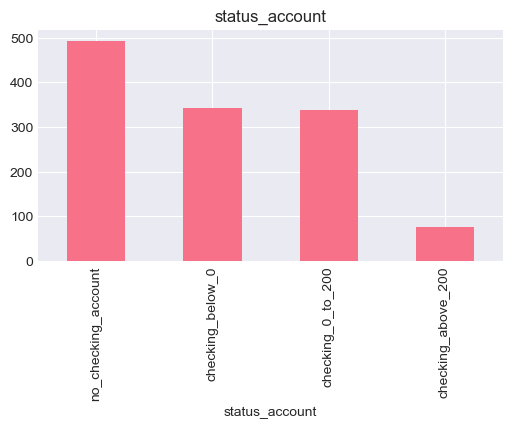

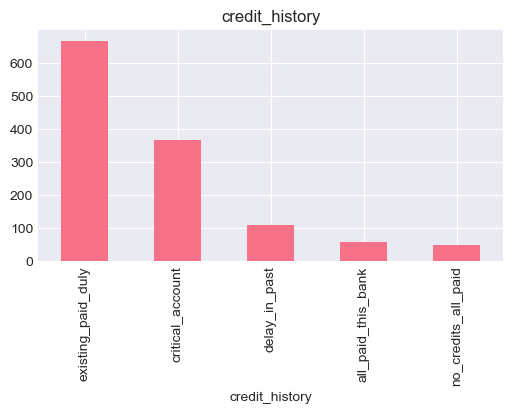

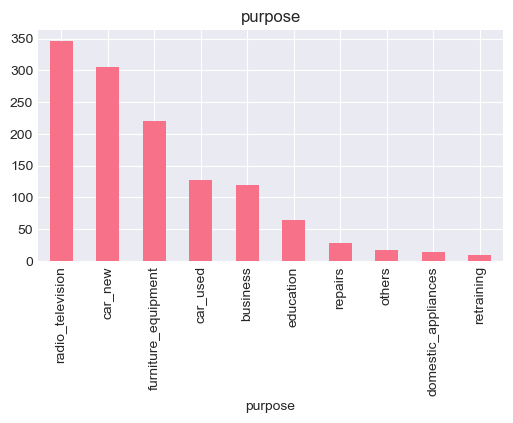

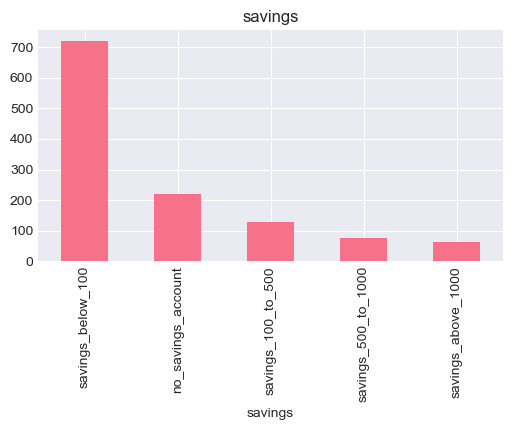

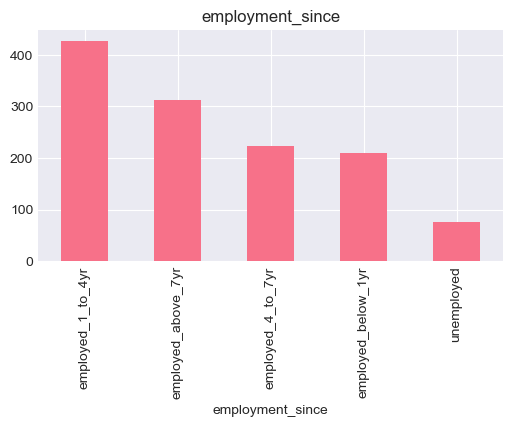

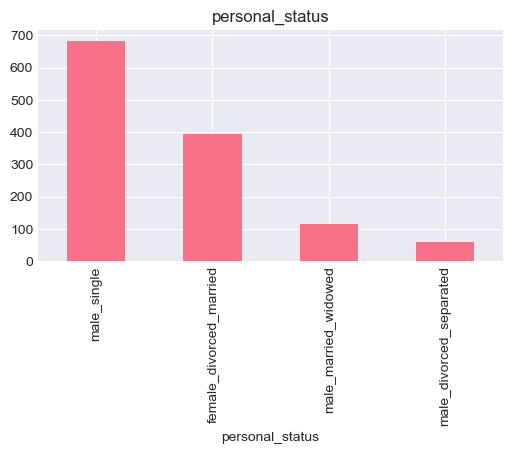

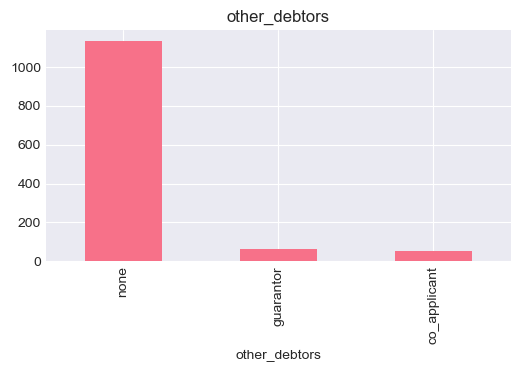

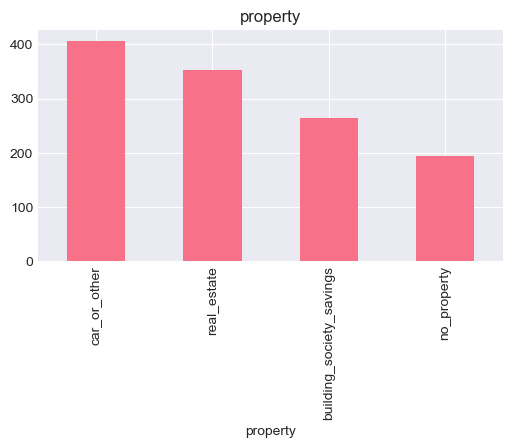

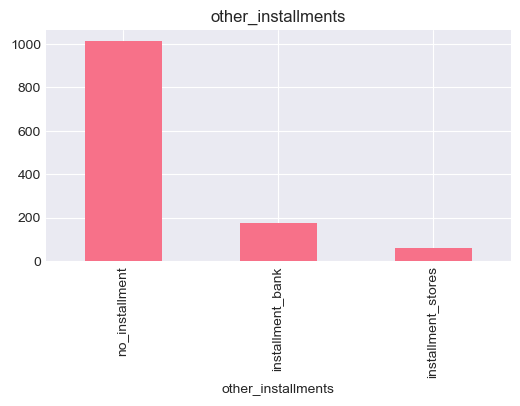

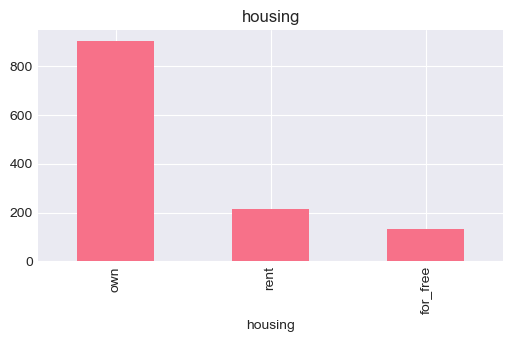

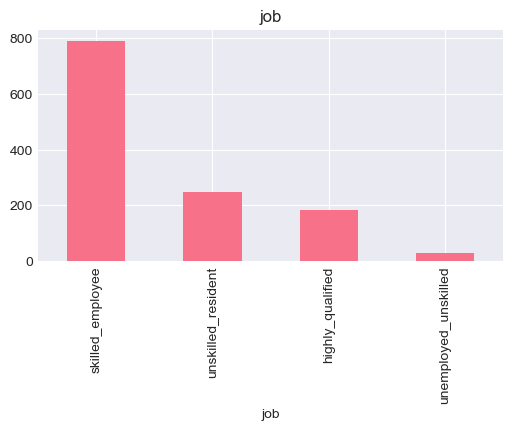

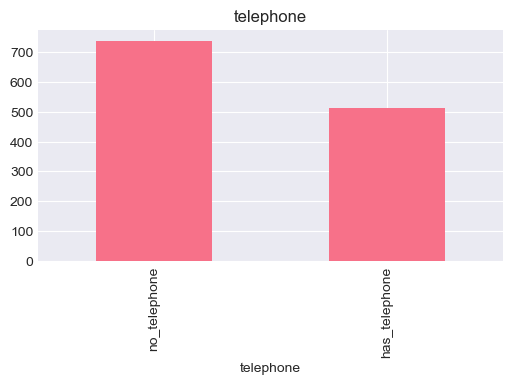

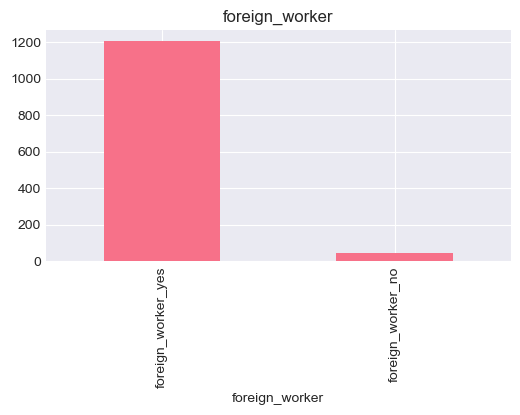

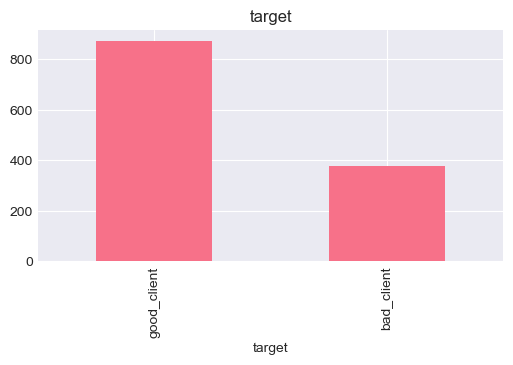

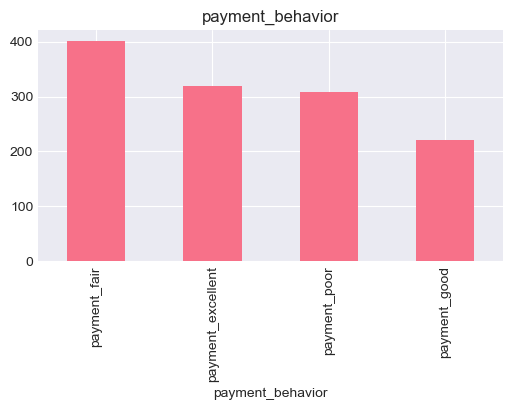

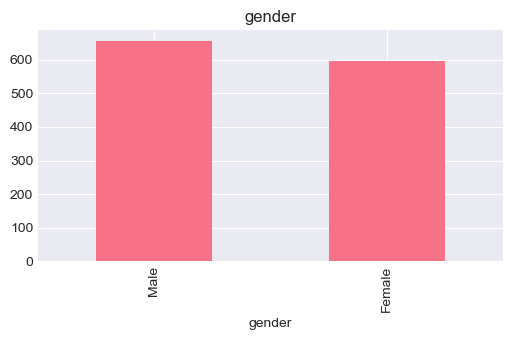

In [33]:
# Ahora procedemos a plotear las variables categoricas segun su distribucion

for col in categorical_cols: 
    df[col].value_counts().plot(kind="bar", figsize=(6,3))
    plt.title(col)
    plt.show()


## 1C Identificación de problemas de calidad de datos


###  Evaluacion datos faltantes

Text(0.5, 1.0, 'Valores faltantes por columna')

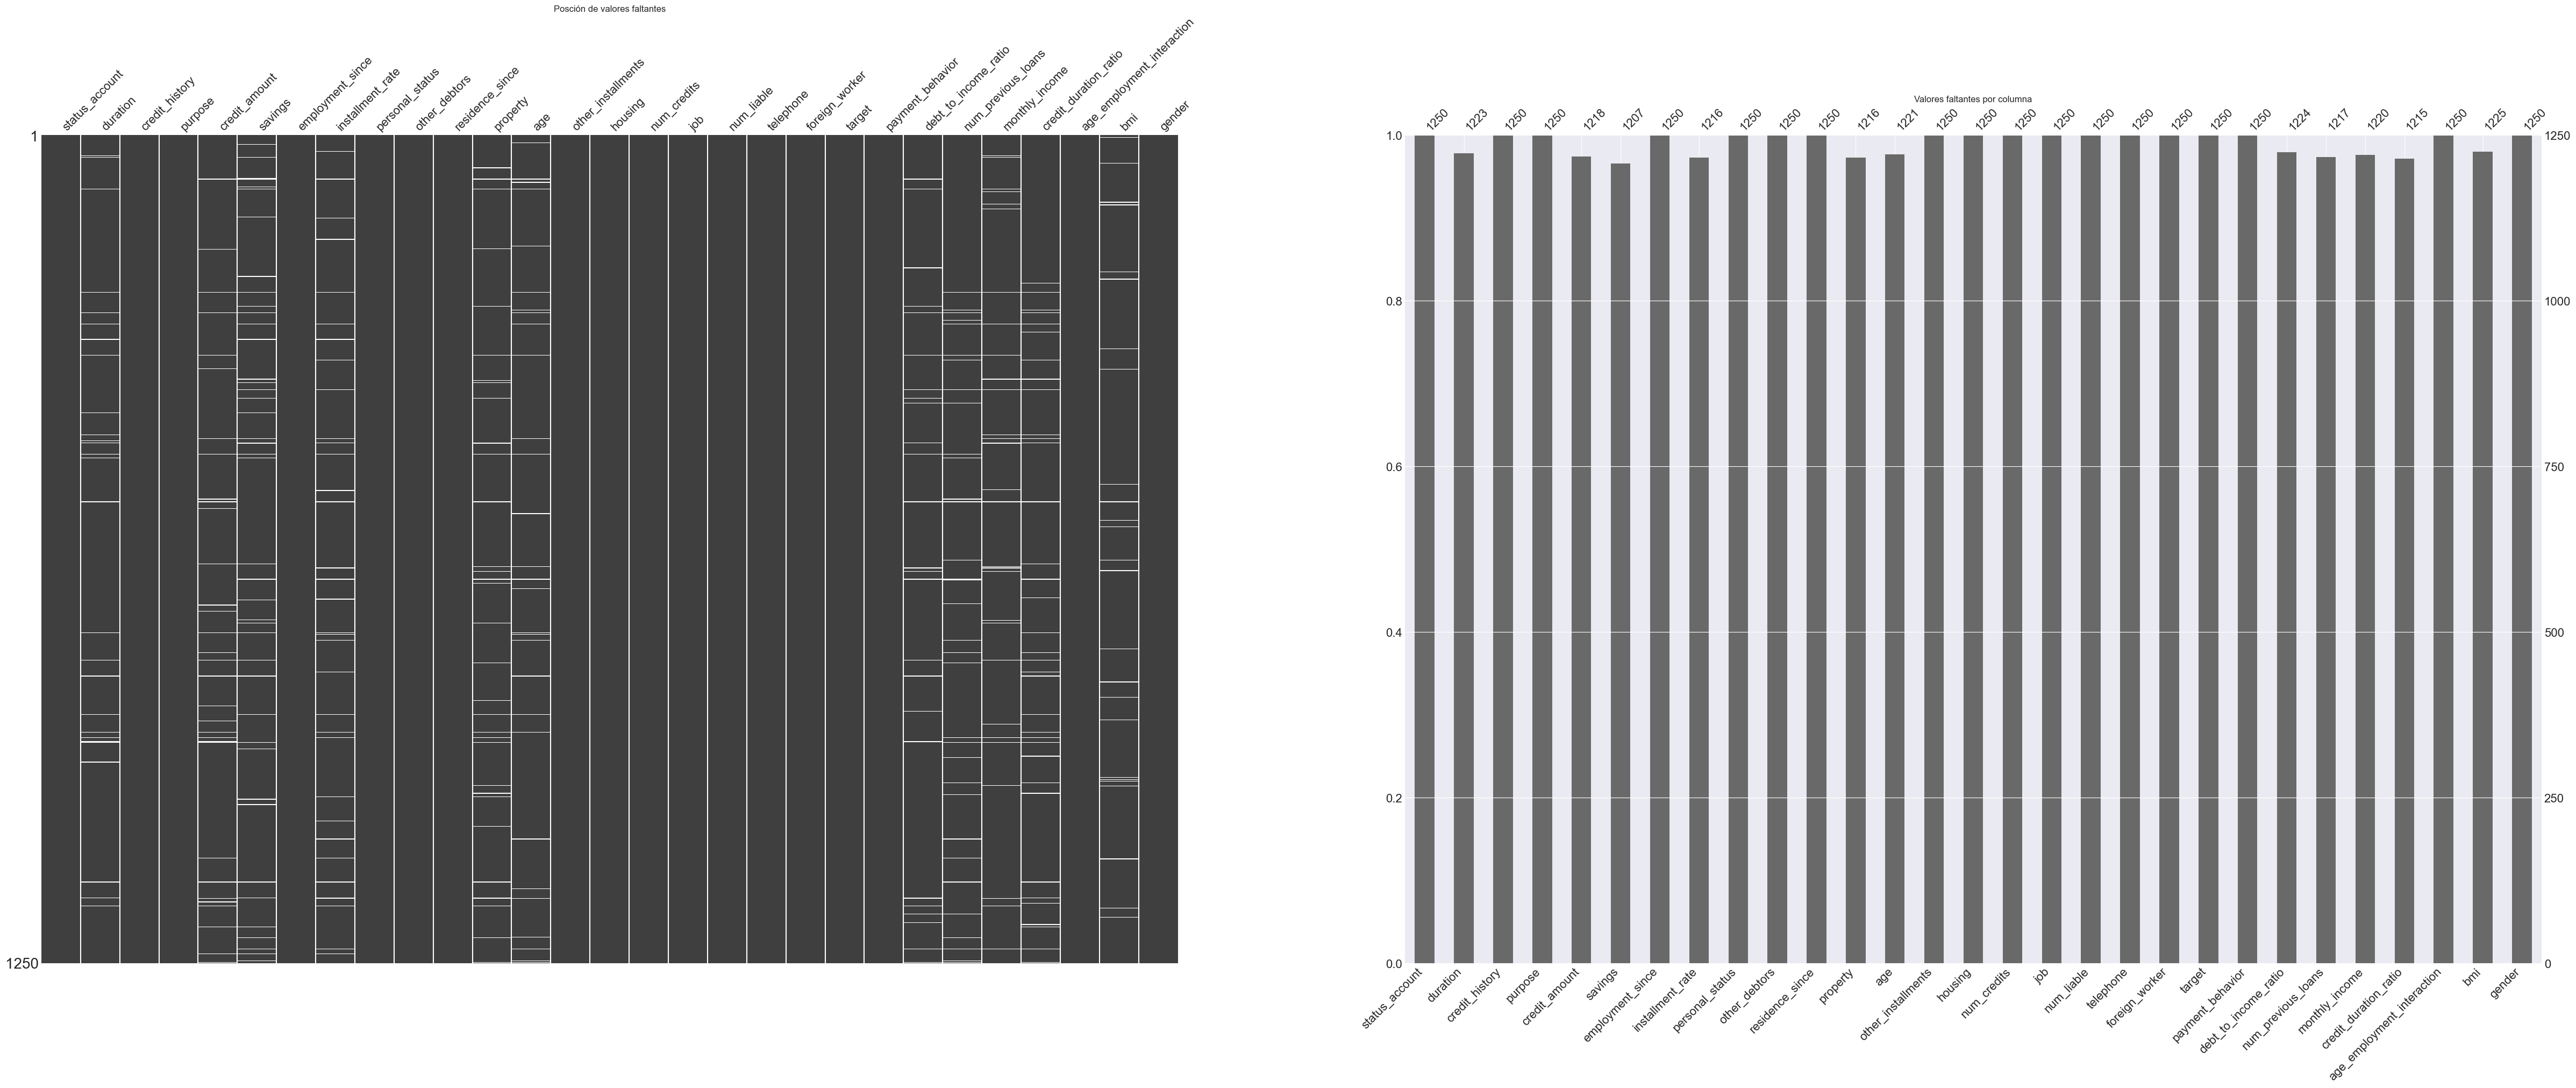

In [34]:
## 1C Identificación de problemas de calidad de datos

#Procedemos a explorar estos valores faltantes de una manera mas visual para eso mportamos la libería de missingno
import missingno as msno

fig, axes=plt.subplots(1,2, figsize=(60,20))

plt.subplot(1,2,1)
msno.matrix(df, ax=plt.gca())
plt.title("Posción de valores faltantes")


plt.subplot(1,2,2)
msno.bar(df, ax=plt.gca())
plt.title("Valores faltantes por columna")

In [40]:
df.isnull().sum()

status_account                 0
duration                      27
credit_history                 0
purpose                        0
credit_amount                 32
savings                       43
employment_since               0
installment_rate              33
personal_status                0
other_debtors                  0
residence_since                0
property                      34
age                           28
other_installments             0
housing                        0
num_credits                    0
job                            0
num_liable                     0
telephone                      0
foreign_worker                 0
target                         0
payment_behavior               0
debt_to_income_ratio          26
num_previous_loans            32
monthly_income                30
credit_duration_ratio         35
age_employment_interaction     0
bmi                           25
gender                         0
dtype: int64

In [41]:
#Generamos una matriz para tener

missing_stats=pd.DataFrame({"faltantes":df.isnull().sum(), 
                            "porcentaje":((df.isnull().sum()/len(df))*100).round(2)})
missing_stats=missing_stats[missing_stats["faltantes"]>0].sort_values(by="faltantes", ascending=False)

print ("Analisis general de cantidad de valores faltantes por columna")
print("--"*80)
print(f"\nEn total hemos identificado una cantidad de ({len(missing_stats)}) columnas con datos faltantes como muestra la siguiente tabla:")
print(f"\n{missing_stats}")
print(f"\n El atributo con mayor cantidad da valores faltantes es ({missing_stats.index[0]}) con ({missing_stats.iloc[0, 0]}) equivalente a un ({missing_stats.loc["savings", "porcentaje"]}%)")

Analisis general de cantidad de valores faltantes por columna
----------------------------------------------------------------------------------------------------------------------------------------------------------------

En total hemos identificado una cantidad de (11) columnas con datos faltantes como muestra la siguiente tabla:

                       faltantes  porcentaje
savings                       43        3.46
credit_duration_ratio         35        2.82
property                      34        2.74
installment_rate              33        2.66
credit_amount                 32        2.58
num_previous_loans            32        2.58
monthly_income                30        2.42
age                           28        2.25
duration                      27        2.17
debt_to_income_ratio          26        2.09
bmi                           25        2.01

 El atributo con mayor cantidad da valores faltantes es (savings) con (43) equivalente a un (3.46%)



###  Evaluacion datos dentro de rango permitido. Evaluacion limites 

#### Evaluacion limites Credit_Amount

In [ ]:
#Rango valido segun literatura Rango: 250 a 18.424 DM
df["credit_amount"].describe()

count     1248.000000
mean      3279.877404
std       2858.525794
min          1.000000
25%       1376.750000
50%       2307.000000
75%       3960.500000
max      19323.000000
Name: credit_amount, dtype: float64

In [ ]:
#Antes de realizar transformacion eliminamos valores fueras del rango permitido 250 a 18.424 DM
mask_invalid_credit_amount=(df["credit_amount"] < 250) | (df["credit_amount"] > 18424)
Qty_valores_incorrectos_credit_amount=mask_invalid_credit_amount.sum()
print(f"Cantidad de valores en Credit_amount fuera del Rango (250 a 18.424 DM) :{Qty_valores_incorrectos_credit_amount}")

Cantidad de valores en Credit_amount fuera del Rango (250 a 18.424 DM) :4


In [ ]:
#Eliminamos esos valores fuera del rango:
df=df.loc[~mask_invalid_credit_amount].copy()
print(f"En total solo eliminamos {Qty_valores_incorrectos_credit_amount} valores que no eran Outliers, eran errores de data por estar fuera del rango establecido")
print(f"Despues de esta eliminacion por analisis de limites en credit_amount tenemos un dataframe de : {df.shape}")

En total solo eliminamos 4 valores que no eran Outliers, eran errores de data por estar fuera del rango establecido
Despues de esta eliminacion por analisis de limites en credit_amount tenemos un dataframe de : (1244, 29)


#### Evaluacion limites Debt_to_income_ratio

In [36]:
#Antes de realizar transformacion eliminamos valores fueras del rango permitido Ratio (0.0 a 1.0)
mask_invalid_debt_to_income=(df["debt_to_income_ratio"] < 0) | (df["debt_to_income_ratio"] > 1)
Qty_valores_incorrectos_debt_to_income=mask_invalid_debt_to_income.sum()
print(f"Cantidad de valores en debt_to_income_ratio fuera del Rango (0.0 a 1.0) :{Qty_valores_incorrectos_debt_to_income}")

Cantidad de valores en debt_to_income_ratio fuera del Rango (0.0 a 1.0) :4


In [37]:
#Eliminamos esos valores fuera del rango:
df=df.loc[~mask_invalid_debt_to_income].copy()

print(f"En total solo eliminamos {Qty_valores_incorrectos_debt_to_income} valores que no eran Outliers, eran errores de data por estar fuera del rango establecido")
print(f"Despues de esta eliminacion por analisis de limites en debt_to_income_ratio tenemos un dataframe de : {df.shape}")

En total solo eliminamos 4 valores que no eran Outliers, eran errores de data por estar fuera del rango establecido
Despues de esta eliminacion por analisis de limites en debt_to_income_ratio tenemos un dataframe de : (1242, 29)


#### Evaluacion limites Monthly_income

#### limites age_employment_interaction

In [ ]:
df["age_employment_interaction"].describe()

count    1236.000000
mean      140.593447
std       114.523950
min         0.000000
25%        55.000000
50%       100.000000
75%       214.500000
max       518.000000
Name: age_employment_interaction, dtype: float64

age_employment_interaction Combina información de edad y estabilidad laboral. En este caso el valor 0 puede ser real en caso no tenga ningun año de trabajar. por lo que no eliminamos esos minimos y 37 × 14 = 518 si es posible.

#### Evaluacion limites BMI

In [ ]:
df["bmi"].describe()

count    1236.000000
mean       25.164634
std         3.862152
min        17.000000
25%        22.500000
50%        25.179510
75%        27.600000
max        38.000000
Name: bmi, dtype: float64

#parece ser que todos los valores estan en un rango real. No eliminamos ningun valor por estar fuera del rango

#### Evaluacion limites age

In [ ]:
## Age

df["age"].describe()

count    1236.000000
mean       35.629450
std        13.991099
min         1.000000
25%        27.000000
50%        33.000000
75%        41.250000
max       304.000000
Name: age, dtype: float64

In [ ]:
# Presenta valores errones que no tienen sentido como 1. Procedemos a eliminar valores fuera del rango permitido Rango: 19 a 75 años 
# Hard constraints Rango: 19 a 75 años
#Antes de realizar transformacion eliminamos valores fueras del Rango permitido: 19 a 75 años
mask_invalid_age=(df["age"] < 19) | (df["age"] > 75)
Qty_valores_incorrectos_age=mask_invalid_age.sum()
print(f"Cantidad de valores age fuera del Rango permitido (19 a 75 años) es igual a ({Qty_valores_incorrectos_age})")

Cantidad de valores age fuera del Rango permitido (19 a 75 años) es igual a (13)


In [ ]:
#Eliminamos esos valores fuera del rango:
df=df.loc[~mask_invalid_age].copy()
print(f"En total hemos eliminado {Qty_valores_incorrectos_age} valores que no eran Outliers. Son errores de data por estar fuera del rango establecido")
print(f"Cantidad de valores despues de eliminación en dataframe df: {len(df)}")

En total hemos eliminado 13 valores que no eran Outliers. Son errores de data por estar fuera del rango establecido
Cantidad de valores despues de eliminación en dataframe df: 1223


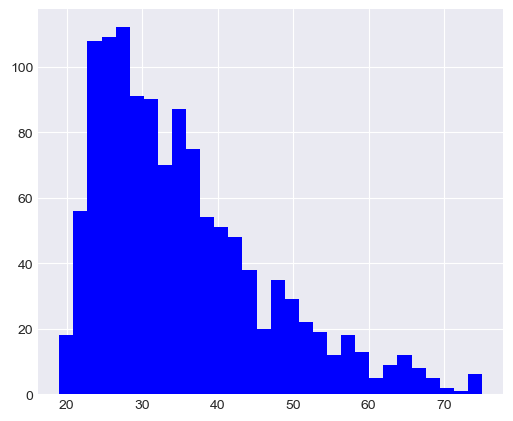

In [ ]:
plt.figure(figsize=(6,5))
plt.hist(df["age"], bins=30, color="blue")
plt.show()

#### Evaluacion limites credit_duration_ratio

In [ ]:

df["credit_duration_ratio"].describe()

count    1236.000000
mean      168.776246
std       169.828617
min        24.060000
25%        90.947500
50%       130.120000
75%       206.042500
max      3175.800000
Name: credit_duration_ratio, dtype: float64

#credit_duration_ratio representa el pago mensual promedio parece ser que todos los valores estan en un rango real no realizamos eliminacion por valores erroneos (hard constraints)

In [ ]:
df["monthly_income"].describe()

count    1240.000000
mean      573.894355
std       194.669197
min       -90.000000
25%       500.000000
50%       500.000000
75%       500.000000
max      1818.000000
Name: monthly_income, dtype: float64

In [ ]:
# Eliminamos los valores que este fuera del rango permitido Rango: 500 a 15.000 DM
mask_invalid_monthly_income=(df["monthly_income"] < 500) | (df["monthly_income"] > 15000)
Qty_valores_incorrectos_monthly_income=mask_invalid_monthly_income.sum()
print(f"Cantidad de valores en monthly_income fuera del Rango (500 a 15.000 DM) :{Qty_valores_incorrectos_monthly_income}")

Cantidad de valores en monthly_income fuera del Rango (500 a 15.000 DM) :4


In [ ]:
df=df.loc[~mask_invalid_monthly_income].copy()
len(df)
print(f"En total solo eliminamos {Qty_valores_incorrectos_monthly_income} valores que no eran Outliers, eran errores de data por estar fuera del rango establecido")
print(f"Despues de esta eliminacion por analisis de limites en debt_to_income_ratio tenemos un dataframe de : {df.shape}")

En total solo eliminamos 4 valores que no eran Outliers, eran errores de data por estar fuera del rango establecido
Despues de esta eliminacion por analisis de limites en debt_to_income_ratio tenemos un dataframe de : (1236, 29)


In [ ]:
df["monthly_income"].describe()

count    1236.000000
mean      575.944175
std       191.602150
min       500.000000
25%       500.000000
50%       500.000000
75%       500.000000
max      1818.000000
Name: monthly_income, dtype: float64

## 1D Análisis de correlaciones

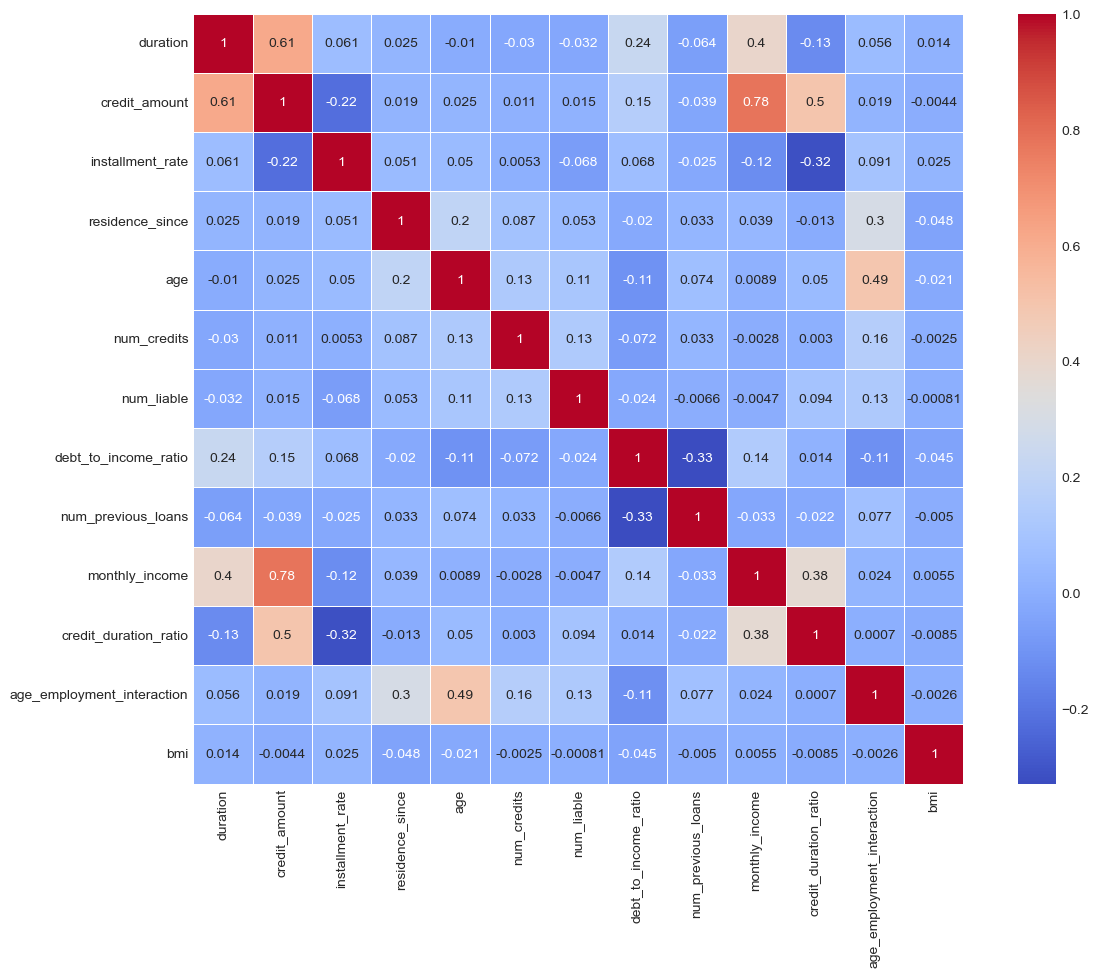

In [39]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.select_dtypes(include="number").corr(),
            fmt='.2g',
            annot=True,
            cmap="coolwarm",
            linewidth=.5,
            square=True)
plt.show()

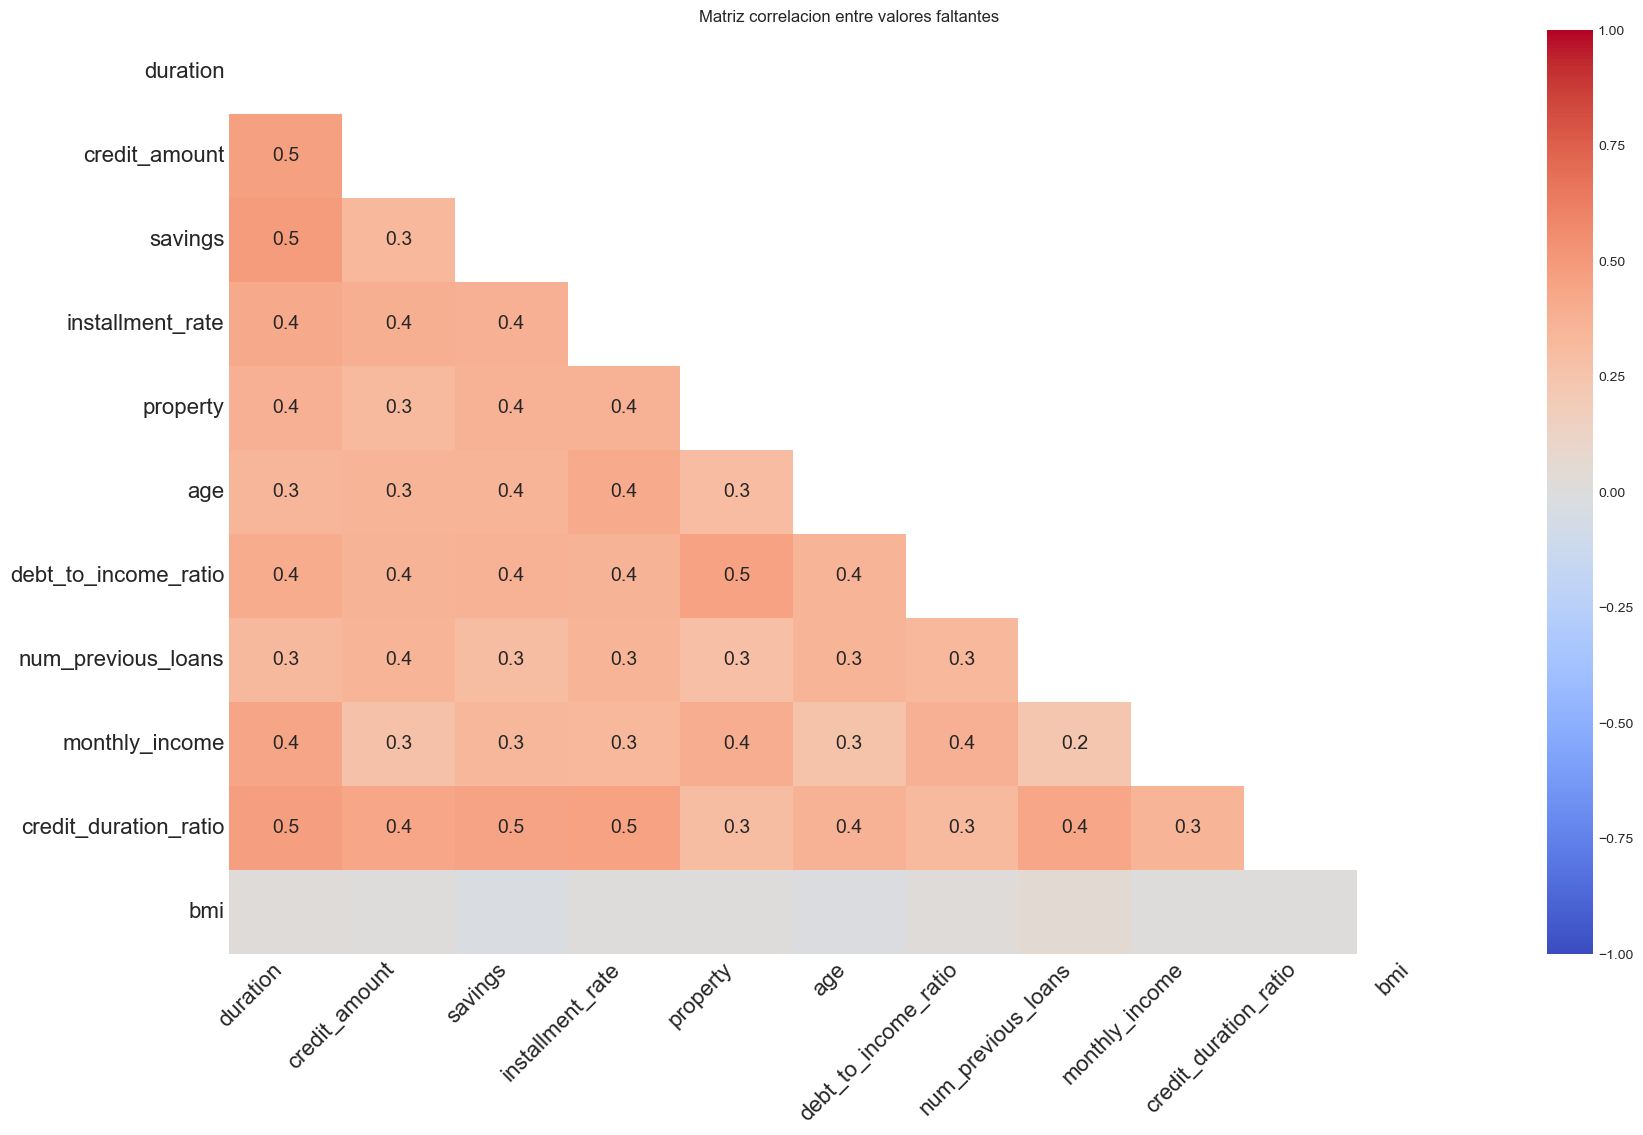

In [42]:
#Procedemos a identificar si hay correlacion entre los valores faltantes del dataset 
msno.heatmap(df,
             cmap="coolwarm")
plt.title("Matriz correlacion entre valores faltantes")
plt.show()

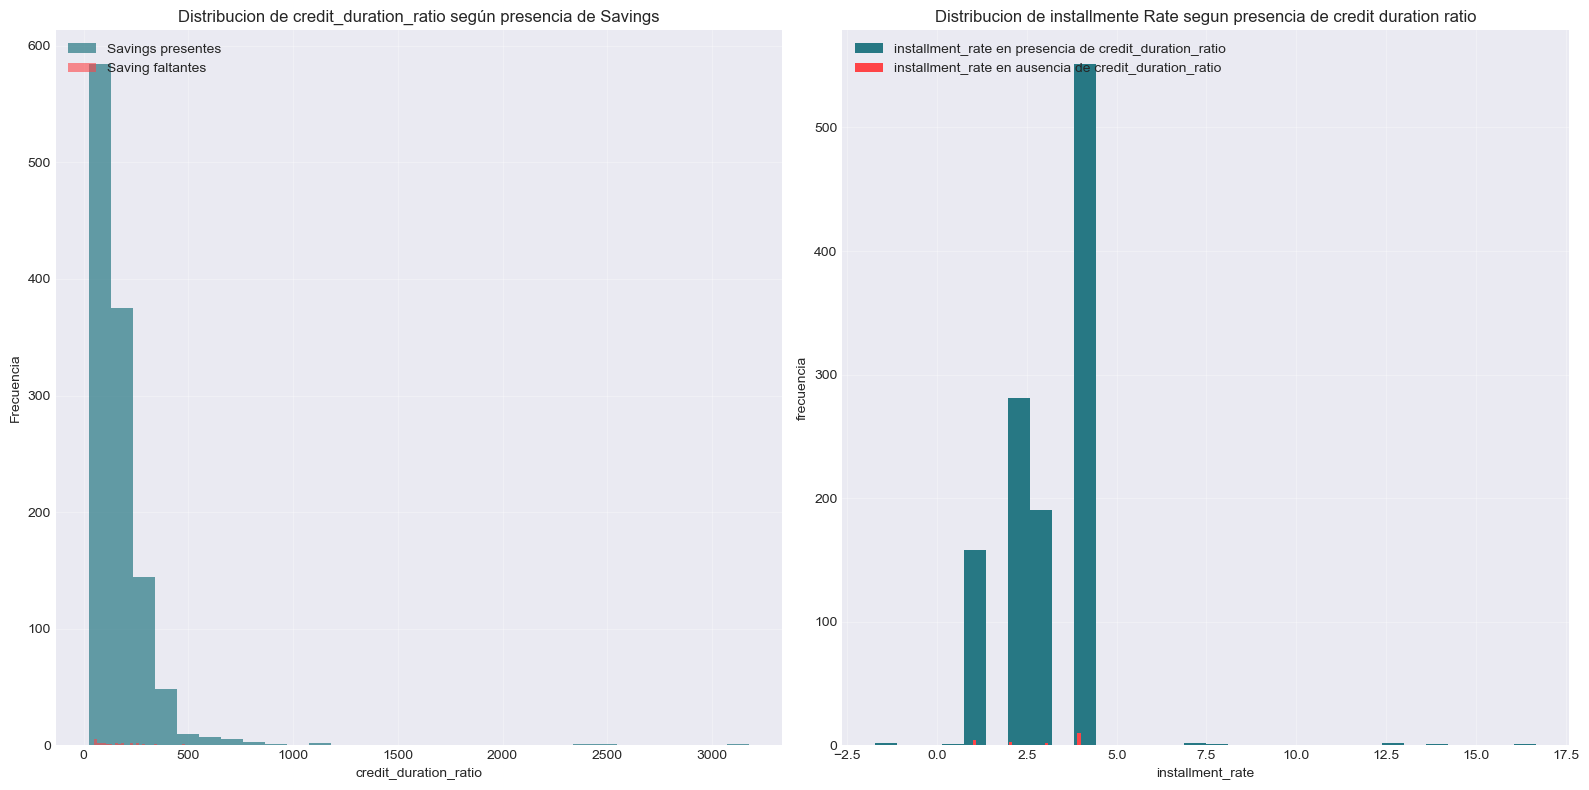

In [44]:
#Vamos a analizar si los valores faltantes de savings dependen de credit_duration_ratio (MAR)

#Distribucion de credit_duration_ratio segun conocimiento de savings 

fig, axes= plt.subplots(1,2, figsize=(16,8))
axes[0].hist(df[df["savings"].notna()]["credit_duration_ratio"], bins=30, label="Savings presentes", alpha=0.7, color="#277884")
axes[0].hist(df[df["savings"].isna()]["credit_duration_ratio"], bins=30, label="Saving faltantes", alpha=0.6, color='#FE4447')
axes[0].set_xlabel("credit_duration_ratio")
axes[0].set_ylabel("Frecuencia")
axes[0].set_title("Distribucion de credit_duration_ratio según presencia de Savings")
axes[0].legend(loc="upper left")
axes[0].grid(alpha=0.3)

# Analizamos la distribucion installment rate en presencia de credit_duration_ratio (MAR)
axes[1].hist(df[df["credit_duration_ratio"].notna()]["installment_rate"], bins=30, label="installment_rate en presencia de credit_duration_ratio", color="#277884")
axes[1].hist(df[df["credit_duration_ratio"].isna()]["installment_rate"], bins=30, label="installment_rate en ausencia de credit_duration_ratio", color='#FE4447')
axes[1].set_xlabel("installment_rate")
axes[1].set_ylabel("frecuencia")
axes[1].set_title("Distribucion de installmente Rate segun presencia de credit duration ratio")
axes[1].legend(loc="upper left")
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 1E Deteccion visual de outliers y valores faltantes

In [45]:
# A pesar de tener 13 variables numericas en nuestro dataset. Los metodos de Outliers son tienen sentido en variables numercias continuas
# Por lo que el tratamiento de Outliers se limitara unicamente a las variables continuas 
print("Existen 13 variables númericas en el df original pero no todas son continuas. " \
"Solo en variables continuas se aplicara el analisis y tratamiento de Outliers")
print("=="*80)
print("\nLISTADO VARIABLES NUM. CONTINUAS")
print("=="*17)
print(f"Listado de variables numercias continuas para analisis y tratamiento de outliers son ({len(continuas)}):")
print(f"\n{continuas}")
print("=="*80)
print("\nLISTADO VARIABLES NUM. DISCRETAS")
print("=="*17)
print(f"Listado de variables numercias DISCRETAS CATEGORICAS ({len(discretas)}):")
print(f"\n{discretas}")

Existen 13 variables númericas en el df original pero no todas son continuas. Solo en variables continuas se aplicara el analisis y tratamiento de Outliers

LISTADO VARIABLES NUM. CONTINUAS
Listado de variables numercias continuas para analisis y tratamiento de outliers son (8):

['duration', 'credit_amount', 'debt_to_income_ratio', 'monthly_income', 'credit_duration_ratio', 'age_employment_interaction', 'bmi', 'age']

LISTADO VARIABLES NUM. DISCRETAS
Listado de variables numercias DISCRETAS CATEGORICAS (5):

['installment_rate', 'num_previous_loans', 'residence_since', 'num_credits', 'num_liable']


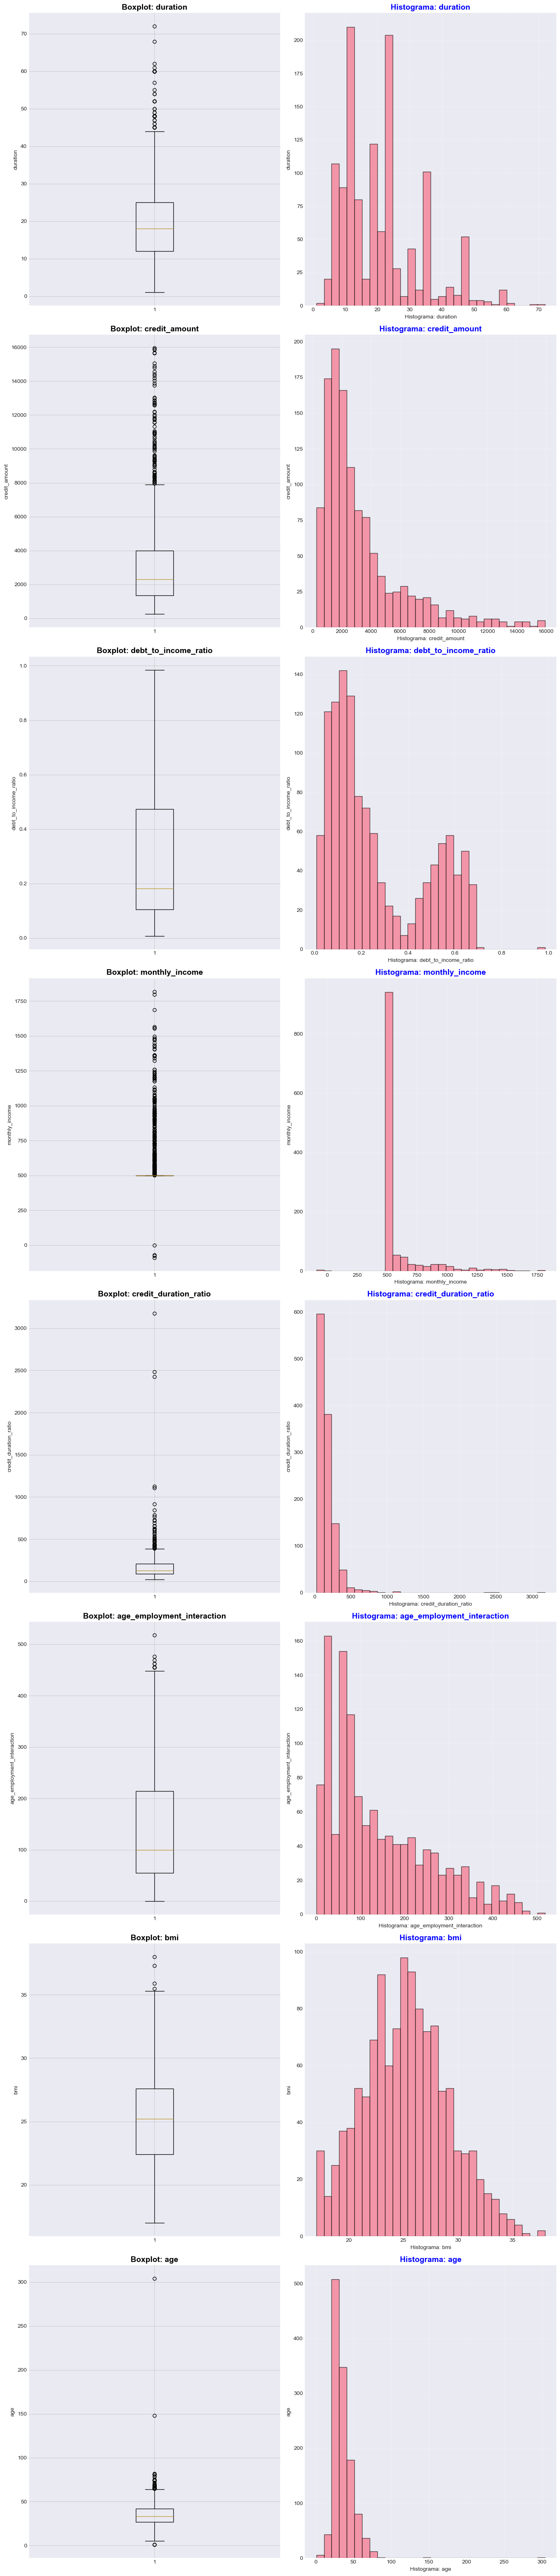

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import warnings

ancho_individual=7
alto_individual=8
nrows=len(continuas)
ncols=2
ancho_global=ancho_individual*ncols
alto_golbal=alto_individual*nrows

fig, axes=plt.subplots(
    nrows=nrows,
    ncols=ncols,
    figsize=(ancho_global, alto_golbal),
    constrained_layout=True
)

#Ploteamos primero el boxplot en la primera fila 

for idx, col in enumerate (continuas):
    axes[idx, 0].boxplot(df[col].dropna())
    axes[idx, 0].set_title(f"Boxplot: {col}", fontsize=14, fontweight="bold", c="black")
    axes[idx, 0].set_ylabel(f"{col}")
    axes[idx, 0].grid(alpha=0.3, c="grey")

#Ahora ploteamos en la segunda fila un histogrma para la misma variable justo debajo
    axes[idx, 1].hist(df[col], bins=30, edgecolor="black", alpha=0.7)
    axes[idx, 1].set_title(f"Histograma: {col}", fontsize=14, fontweight="bold", color="Blue")
    axes[idx,1].set_ylabel(f"{col}")
    axes[idx,1].set_xlabel(f"Histograma: {col}")
    axes[idx,1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


# 2. **Pipeline de Preprocesado** - 30%